In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('winemag-data_first150k.csv')

In [121]:
data.shape

(150930, 11)

In [122]:
data.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [123]:
#There are total 150930 rows. There are null values in country, designation, price, province, region1 and region2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [124]:
data.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


# Data Preprocessing

### Managing missing data

In [134]:
#Total null values:
data.isnull().sum().sum()

174477

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [131]:
#group the points of wine by country

In [132]:
data.groupby('country').points.mean()

country
Albania                   88.000000
Argentina                 85.996093
Australia                 87.892475
Austria                   89.276742
Bosnia and Herzegovina    84.750000
Brazil                    83.240000
Bulgaria                  85.467532
Canada                    88.239796
Chile                     86.296768
China                     82.000000
Croatia                   86.280899
Cyprus                    85.870968
Czech Republic            85.833333
Egypt                     83.666667
England                   92.888889
France                    88.925870
Georgia                   85.511628
Germany                   88.626427
Greece                    86.117647
Hungary                   87.329004
India                     87.625000
Israel                    87.176190
Italy                     88.413664
Japan                     85.000000
Lebanon                   85.702703
Lithuania                 84.250000
Luxembourg                87.000000
Macedonia           

### missing values:

In [137]:
data.isnull().mean()*100

Unnamed: 0      0.000000
country         0.003313
description     0.000000
designation    30.302127
points          0.000000
price           9.073743
province        0.003313
region_1       16.603724
region_2       59.615053
variety         0.000000
winery          0.000000
dtype: float64

### 1. remove rows
#### We can remove the rows with missing data less than 5% of the total values in the row.

In [145]:
cols=[x for x in data.columns if data[x].isnull().mean() < 0.05 and data[x].isnull().mean() > 0]
cols

['country', 'province']

In [148]:
data[cols].sample(5)

,country,province
99946,Portugal,Douro
93706,US,California
59162,Italy,Southern Italy
53205,US,California
84272,US,New York


In [149]:
# data left after dropping the columns

In [150]:
len(data[cols].dropna())/len(data)

0.9999668720598953

In [ ]:
# hence we drop the rows

In [152]:
new_data=data[cols].dropna()
data.shape,new_data.shape

((150930, 11), (150925, 2))

In [160]:
#for categorical data we will just try to see if the ratios of the categorical column is still maintained.
temp=pd.concat([data['country'].value_counts()/len(data),new_data['country'].value_counts()/len(new_data)], axis=1)
temp.columns=['original','after removing']
temp

,original,after removing
US,0.413417,0.413431
Italy,0.155556,0.155561
France,0.139787,0.139791
Spain,0.054780,0.054782
Chile,0.038534,0.038536
Argentina,0.037309,0.037310
Portugal,0.035261,0.035263
Australia,0.032843,0.032844
New Zealand,0.021997,0.021998
Austria,0.020254,0.020255


In [166]:
# hardly any difference. so no problem in removing rows
data=data.dropna(subset=['country','province'],axis=0)

In [167]:
data.isnull().mean()*100

Unnamed: 0      0.000000
country         0.000000
description     0.000000
designation    30.303131
points          0.000000
price           9.074043
province        0.000000
region_1       16.600961
region_2       59.613715
variety         0.000000
winery          0.000000
dtype: float64

#### 2. Filling Values

##### region1, region2 has a lot of missing values. Using mode to fill

In [201]:
data.groupby(['country'])['region_1'].size().max()

62397

In [196]:
mode

6209

In [175]:
X=data.drop(columns=['points'])
y=data['points']
#first we do train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [176]:
X_train.shape, X_test.shape

((120740, 10), (30185, 10))

In [178]:
X_train.isnull().mean()*100

Unnamed: 0      0.000000
country         0.000000
description     0.000000
designation    30.225277
price           9.106344
province        0.000000
region_1       16.575286
region_2       59.531224
variety         0.000000
winery          0.000000
dtype: float64

In [1]:
import sketch

In [12]:
data.sketch.howto('give me visualization of top 3 country with maximum number of maximum points')

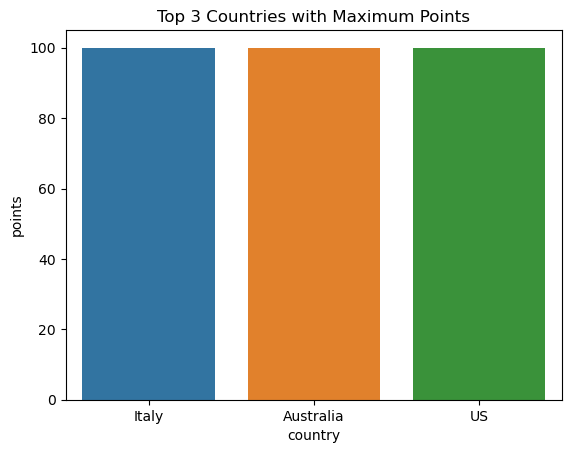

In [13]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# create a dataframe with the required columns
df = data[['country', 'points']].groupby('country').max().reset_index()

# plot the visualization
sns.barplot(x='country', y='points', data=df.sort_values(by='points', ascending=False).head(3))
plt.title('Top 3 Countries with Maximum Points')
plt.show()

In [ ]:
data.pandasprofiling

SyntaxError: invalid syntax (4101207405.py, line 1)

In [130]:
# drop duplicates
# data.drop_duplicates(inplace=True)
# data.info()